In [57]:
from impedance.models.circuits import CustomCircuit
from impedance import preprocessing

frequencies, Z = preprocessing.readBioLogic("MPT files/1_00V_10cyc.mpt")

circuit = 'R_0-p(R_1,C_1)-p(R_2,C_2)'
initial_guess = [10., .1, 1e-6, 1.e6, 1e-6]
circuit = CustomCircuit(circuit, initial_guess=initial_guess)

circuit.fit(frequencies, Z)
Z_fit = circuit.predict(frequencies)
print (circuit)


Circuit string: R_0-p(R_1,C_1)-p(R_2,C_2)
Fit: True

Initial guesses:
    R_0 = 1.00e+01 [Ohm]
    R_1 = 1.00e-01 [Ohm]
    C_1 = 1.00e-06 [F]
    R_2 = 1.00e+06 [Ohm]
    C_2 = 1.00e-06 [F]

Fit parameters:
    R_0 = 1.22e+01  (+/- 1.41e-01) [Ohm]
    R_1 = 3.06e+01  (+/- 4.33e+00) [Ohm]
    C_1 = 3.05e-03  (+/- 1.77e-04) [F]
    R_2 = 5.79e+05  (+/- 1.26e+06) [Ohm]
    C_2 = 2.00e-04  (+/- 7.91e-07) [F]



In [58]:
import matplotlib.pyplot as plt

circuit.plot(f_data=frequencies, Z_data=Z)
#circuit.plot(f_data=frequencies, Z_data=Z, kind='bode')
#circuit.plot(f_data=frequencies, Z_data=Z, kind='nyquist')

#plt.show()

/home/codespace/.python/current/lib/python3.10/site-packages/impedance/visualization.py:171: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Z_df = pd.concat([Z_df, df], ignore_index=True)
/home/codespace/.python/current/lib/python3.10/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/home/codespace/.python/current/lib/python3.10/site-packages/altair/vegalite/v5/api.py:398: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is dep

alt.HConcatChart(...)

/home/codespace/.python/current/lib/python3.10/site-packages/impedance/visualization.py:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(np.real(Z), -np.imag(Z), fmt, **kwargs)
/home/codespace/.python/current/lib/python3.10/site-packages/impedance/visualization.py:39: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.
  ax.plot(np.real(Z), -np.imag(Z), fmt, **kwargs)


(0.0, 20.0)

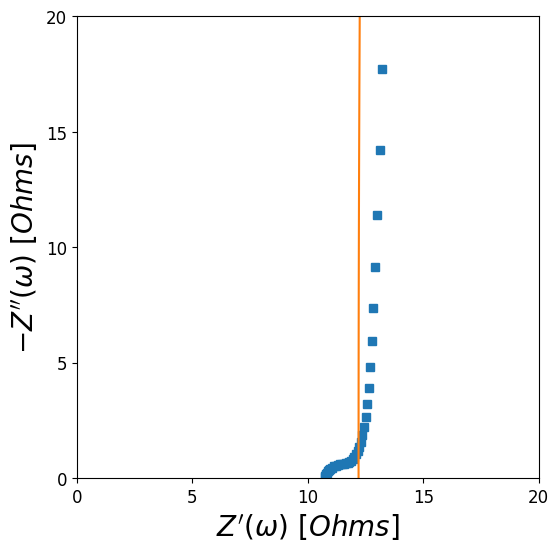

In [59]:
fig, ax = plt.subplots(figsize=(6,6))
ax = circuit.plot(ax, frequencies, Z, kind='nyquist')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(False)
ax.set_xlim([0,20])
ax.set_ylim([0,20])

#plt.show()